# Name : Samarth Deshpande
# Student ID :8894058

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as fMNIST
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
# Loading the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fMNIST.load_data()

4422102/4422102 [==============================] - 1s 0us/step
Image Data Type: <class 'numpy.ndarray'>
Image Element Data Type: <class 'numpy.uint8'>
Label Element Data Type: <class 'numpy.uint8'>

**Shapes:**


# Loading the MNIST Dataset and exploring the Train and Test Set along with Train and Test Labels

In [17]:
# Exploring the dataset's data types and shapes
print(f'Image Data Type: {type(train_images)}')
print(f'Image Element Data Type: {type(train_images[0, 0, 0])}')
print(f'Label Element Data Type: {type(train_labels[0])}')

Image Data Type: <class 'numpy.ndarray'>
Image Element Data Type: <class 'numpy.uint8'>
Label Element Data Type: <class 'numpy.uint8'>


In [14]:
#Displaying shapes of training data
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}',"\n")

Train Data:
Images: (60000, 28, 28)
Labels: (60000,) 



In [15]:
# Display shapes of testing data
print('Test Data:')
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')

Test Data:
Images: (10000, 28, 28)
Labels: (10000,)


In [16]:
# Display the range of image data values
print('\nImage Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')


Image Data Range:
Min: 0
Max: 255


# Checking the balance of labels in the train set

In [18]:
# Determining the number of unique classes in the training labels
num_unique_classes = len(np.unique(train_labels))

# Initializing a dictionary to track the distribution of samples for each class
class_sample_distribution = {class_label: 0 for class_label in range(num_unique_classes)}

# Counting the occurrences of each class in the training labels
for label in train_labels:
    class_sample_distribution[label] += 1

# Displaying the distribution of samples for each class
for class_label, count in class_sample_distribution.items():
    print(f"Class {class_label}: {count} samples")

Class 0: 6000 samples
Class 1: 6000 samples
Class 2: 6000 samples
Class 3: 6000 samples
Class 4: 6000 samples
Class 5: 6000 samples
Class 6: 6000 samples
Class 7: 6000 samples
Class 8: 6000 samples
Class 9: 6000 samples


# Inferences

A balanced training set means that the quantity of number of samples in each class is roughly equal and it is not heavily skewed. It help the model to prevent bias. When the train data is imbalanced the model may be biased towards a particular class since it has more number of data of that particular class.

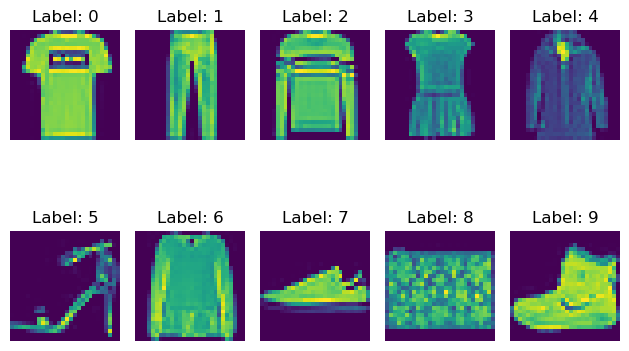

In [19]:
for i in range(10):
    # each unique class is represented by i here so this will find the index of the first image in the train set belonging to a unique class)
    unique_index = train_labels.tolist().index(i) 
    plt.subplot(2, 5, i + 1) 
    plt.imshow(train_images[unique_index], cmap='viridis')
    plt.title("Label: {}".format(i))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1
test_images = test_images.reshape((10000, 28 * 28))

# Preprocess the data and converting it between 0 and 1
train_images = train_images.astype('float') / 255.0
test_images = test_images.astype("float") / 255.0

In [21]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Building the Model

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [25]:
custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2167 - accuracy: 0.9187
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2050 - accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2012 - accuracy: 0.9248
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1900 - accuracy: 0.9276
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1849 - accuracy: 0.9301
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1825 - accuracy: 0.9305
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1731 - accuracy: 0.9351
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1687 - accuracy: 0.9360
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1637 - accuracy: 0.9380
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [28]:
# Example with a different learning rate
custom_optimizer2 = keras.optimizers.SGD(learning_rate=0.005)  
model.compile(optimizer=custom_optimizer2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1230 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1146 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1114 - accuracy: 0.9592
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1095 - accuracy: 0.9601
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1081 - accuracy: 0.9601


In [29]:
custom_optimizer3 = keras.optimizers.SGD(learning_rate=0.005)  
model.compile(optimizer=custom_optimizer2, loss='mean_absolute_error', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 4.4200 - accuracy: 0.9611
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 4.4200 - accuracy: 0.9611
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 4.4200 - accuracy: 0.9611
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 4.4200 - accuracy: 0.9611
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 4.4200 - accuracy: 0.9611


A higher learning rate allows the model to learn faster, thats why after inceresing the learning rate accuracy increased, but it may risk overshooting the optimal weights and missing the minimum of the loss function. On the other hand, a lower learning rate makes the learning process more stable but may require more epochs to converge.

The loss seems constant at 4.42, because we have used  mean_absolute_error as the loss function for classification tasks. It's more suitable for regression tasks.

# Inferences

Configuration 2 with the SGD optimizer and 'sparse_categorical_crossentropy' loss achieved a high accuracy of 96.01%, indicating good performance.
Configuration 1 with the Adam optimizer also performed well with an accuracy of 94.08%.
Configuration 3 with 'mean_absolute_error' loss didn't seem appropriate for this classification task, resulting in constant loss and accuracy.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 512)                 401920    
                                                                 
 dense_1 (Dense)             (32, 10)                  5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# The test label for 9 is label "7

In [41]:
test_labels[9]

7

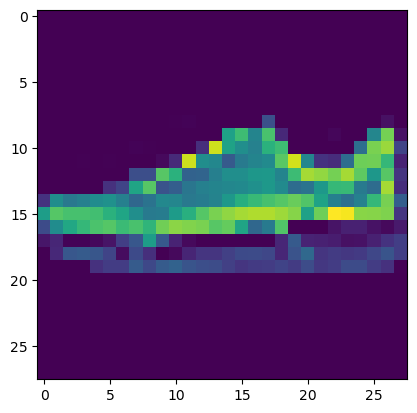

In [40]:
plt.imshow(test_images[9:10].reshape(28,28), cmap='viridis')  # the actual image

# Predicting the test label [9] i.e Label "7"

In [42]:
pred = model.predict(test_images[9:10])
pred

1/1 [==============================] - 0s 332ms/step


array([[5.8344139e-17, 9.4467718e-17, 5.3697415e-20, 2.3740168e-20,
        2.6751024e-19, 1.8350856e-09, 4.3573542e-18, 1.0000000e+00,
        9.1759348e-13, 1.7274079e-10]], dtype=float32)

# Accuarcy for predicting "Label 7".

In [44]:
pred[0,7]

1.0

# Evaluating the Model using test data

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Get model predictions oj test data
model_predictions = model.predict(test_images)
pred_labels = np.argmax(model_predictions, axis=1)

313/313 [==============================] - 3s 7ms/step - loss: 4.4200 - accuracy: 0.9007
Test accuracy: 0.9006999731063843
313/313 [==============================] - 2s 6ms/step


Test Accuray is 90 percent 

# Confusion Matrix

In [46]:
# Create the confusion matrix
confusion_matrix = confusion_matrix(test_labels, pred_labels)
confusion_matrix

array([[869,   1,  14,  17,   4,   0,  88,   0,   7,   0],
       [  3, 977,   0,  12,   4,   0,   4,   0,   0,   0],
       [ 17,   0, 833,  11,  76,   1,  62,   0,   0,   0],
       [ 24,   8,  14, 905,  23,   0,  22,   0,   4,   0],
       [  1,   0,  76,  32, 839,   0,  51,   0,   1,   0],
       [  0,   0,   0,   0,   0, 969,   0,  18,   0,  13],
       [122,   0,  74,  24,  65,   0, 709,   0,   6,   0],
       [  0,   0,   0,   0,   0,   6,   0, 967,   1,  26],
       [  8,   0,   3,   4,   2,   2,   2,   1, 978,   0],
       [  0,   0,   0,   0,   0,   7,   1,  31,   0, 961]], dtype=int64)